<a href="https://colab.research.google.com/github/ViRoTex/Exercises-Statistics-R-and-Python/blob/main/09_Histogramas_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histogramas con Python

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [182]:
births = pd.read_csv("/us-births.csv")

In [183]:
births.shape

(15547, 5)

In [184]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [185]:
births.tail()

,year,month,day,gender,births
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235


In [186]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum')

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023
1974,1543005,1627626
1975,1535546,1618010
1976,1547613,1628863
1977,1623363,1708796


In [187]:
births['decade'] = (births['year']//10)*10 # para trabajar por décadas

In [188]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [189]:
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [190]:
%matplotlib inline 

In [191]:
import seaborn as sb

In [192]:
sb.set()

<Figure size 1080x576 with 0 Axes>

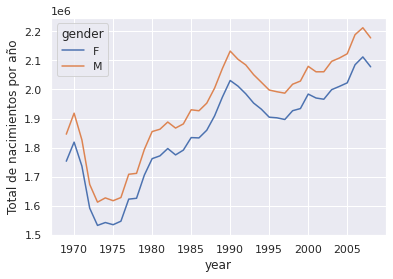

In [193]:
plt.figure(figsize = (15,8))
births.pivot_table('births', index = 'year', columns = 'gender', aggfunc = 'sum').plot()
plt.ylabel("Total de nacimientos por año")
plt.show()

In [194]:
# para la limpieza de datos de NaN o valores mal escritos se puede hacer por quartiles
# de forma directa
quartiles = np.percentile(births['births'], [25,50,75]) # percentiles 25,50,75
quartiles

array([4358. , 4814. , 5289.5])

In [195]:
# otra forma indirecta sería:
med = quartiles[1] # mediana
IQR = quartiles[2]-quartiles[0] # IQR, 
sig = 0.75*IQR

In [196]:
# para filtrar dinámicamente podemos hacerlo de la siguiente manera:
births = births.query("(births > @med - 5*@sig) & (births < @med +5*@sig)") 

In [197]:
births.shape # 14610 días, se han eliminado los días con datos anómalos

(14610, 6)

In [198]:
births['day'] = births['day'].astype(int) # para convertir la columna día en número entero

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [199]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [200]:
births.index = pd.to_datetime (10000*births.year +100*births.month +births.day, format = "%Y%m%d") # pasa a ser un objeto de fecha pandas 

In [201]:
births.head()

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960
1969-01-01,1969,1,1,M,4440,1960
1969-01-02,1969,1,2,F,4454,1960
1969-01-02,1969,1,2,M,4548,1960
1969-01-03,1969,1,3,F,4548,1960


In [202]:
births['dayofweek'] = births.index.dayofweek # para ver el día de la semana correspondiente

In [203]:
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


In [204]:
births.pivot_table('births', index = 'dayofweek', columns = 'decade', aggfunc = "mean")

decade,1960,1970,1980
dayofweek,,,
0,5063.826923,4689.097701,5276.907249
1,5286.096154,4885.252399,5503.842553
2,5074.622642,4750.376200,5367.642553
3,4978.288462,4696.923372,5333.485106
4,5107.884615,4782.095785,5393.087234
5,4651.057692,4207.784483,4483.901064
6,4342.346154,3979.278736,4308.120469


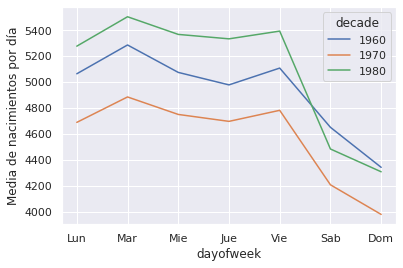

In [205]:
births.pivot_table('births', index = 'dayofweek', columns = 'decade', aggfunc = "mean").plot()
plt.gca().set_xticklabels(['', 'Lun', 'Mar','Mie', 'Jue', 'Vie','Sab','Dom'])
plt.ylabel("Media de nacimientos por día")
plt.show()

In [206]:
# ¿hay días más raros de tener un hijo?
births_by_date = births.pivot_table('births', index = [births.index.month, births.index.day], aggfunc = "mean")

In [207]:
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [208]:
# ¿qué pasa con los años bisiestos?por ejemplo, el año 2020
births_by_date.index = [pd.datetime(2020, month, day) for (month, day) in births_by_date.index]

In [209]:
births_by_date.head()

,births
2020-01-01,4009.225
2020-01-02,4247.400
2020-01-03,4500.900
2020-01-04,4571.350
2020-01-05,4603.625


<Figure size 864x288 with 0 Axes>

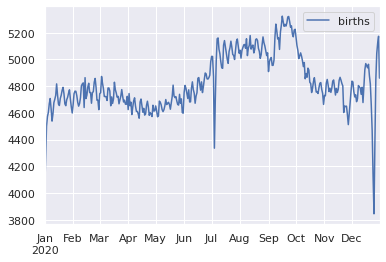

In [210]:
plt.figure(figsize =(12,4))
births_by_date.plot()
plt.show()

# Histogramas en Python

## Histogramas en Python puro (sin usar ninguna librería)

In [211]:
# vamos a crear un vector o array de datos
x = (0,1,1,1,2,2,3,7,7,7,25)

In [212]:
# crear una función que creará una secuencia y devolverá un diccionario

def count_elements(seq)-> dict: 
  """
  Función que cuenta las frecuencias
  de aparición de cada elemento de la secuencia, 
  creando un diccionario como si fuese una 
  tabla de frecuencias
  """
  hist = {}
  for i in seq:
    hist[i] = hist.get(i,0) + 1
  return hist  

In [213]:
fAbs = count_elements(x) # frecuencia absoluta

In [214]:
fAbs # sería lo mismo que la función Counter que vemos a continuación

{0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1}

In [215]:
from collections import Counter

In [216]:
fAbs2 = Counter(x)

In [217]:
fAbs2

Counter({0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1})

In [218]:
fAbs.items() == fAbs2.items()

True

In [219]:
def ascii_histogram(seq) -> None:
  """
  Un histograma de frecuencias absolutas colocado en horizontal y con caracteres ASCII
  """
  fAbs = count_elements(seq)
  for k in sorted(fAbs):
    print('{0:5d}{1}'.format(k, '+'*fAbs[k]))

In [220]:
ascii_histogram(x)

    0+
    1+++
    2++
    3+
    7+++
   25+


In [221]:
import random
random.seed(2019)

In [222]:
vals = [1,2,3,5,7,8,9,10]
freqs = (random.randint(5,20) for _ in vals)

In [223]:
data = [] # k para vals y v para freqs
for k,v in zip(vals, freqs):
  data.extend([k]*v)

In [225]:
data

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10]

In [226]:
ascii_histogram(data) # cada cruz indica una frecuencia, es un histograma manual

    1+++++++++
    2++++++++++++
    3++++++++++++++++++++
    5++++++++++
    7++++++++++++
    8++++++++++++
    9+++++++++++++++
   10++++++++++++++


## Histogramas con Numpy
Función histogram() de numpy

Ejemplo con la distribución de Laplace

In [227]:
import numpy as np

In [228]:
np.random.seed(2019)

In [229]:
np.set_printoptions(precision = 3)

In [230]:
x = np.random.laplace(loc = 10, scale =3, size = 1000)

In [231]:
x[:10]

array([14.935,  9.278, 10.855, 10.968, 14.294,  8.459, 11.555, 14.926,
       14.316,  9.373])

In [232]:
hist, bin_edges = np.histogram(x)

In [233]:
hist

array([  1,   0,   0,   8,  48, 194, 542, 167,  31,   9])